# Prosper Loan Data Exploration
## Magalaweng Clive Mmakola

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## Index
- <a href='#Preliminary-Wrangling'>Preliminary Wrangling</a>
- <a href='#Univariate-Exploration'>Univariate Exploration</a>
- <a href='#Bivariate-Exploration'>Bivariate Exploration</a>
- <a href='#Multivariate-Exploration'>Multivariate Exploration</a>
- <a href='#Conclusions'>Conclusions</a>

## Preliminary-Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
font = {
    'family': 'DejaVu Sans',
    'color': '#999999',
    'size': 12
}

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
# Glimpse of how the data is structured
loans = pd.read_csv('prosperLoanData.csv')
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# Summary information about the data and number of observations
print(loans.shape)
loans.info()

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

In [5]:
# Select features of interest
mask = [
    'BorrowerAPR','Term', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'Occupation', 'EmploymentStatus',
    'EmploymentStatusDuration', 'CreditScoreRangeLower','BorrowerRate', 'ProsperScore', 'CreditScoreRangeUpper',
    'IsBorrowerHomeowner','MonthlyLoanPayment', 'Investors', 'CurrentDelinquencies', 'AmountDelinquent',
    'DebtToIncomeRatio', 'IncomeRange', 'LoanOriginalAmount', 'LoanOriginationDate', 'InvestmentFromFriendsCount'
    , 'InvestmentFromFriendsAmount', 'Investors'
]

loans_features = loans[mask]
loans_features.head()

,BorrowerAPR,Term,ProsperRating (Alpha),ListingCategory (numeric),Occupation,EmploymentStatus,EmploymentStatusDuration,CreditScoreRangeLower,BorrowerRate,ProsperScore,...,Investors,CurrentDelinquencies,AmountDelinquent,DebtToIncomeRatio,IncomeRange,LoanOriginalAmount,LoanOriginationDate,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,0.16516,36,NaN,0,Other,Self-employed,2.0,640.0,0.1580,NaN,...,258,2.0,472.0,0.17,"$25,000-49,999",9425,2007-09-12 00:00:00,0,0.0,258
1,0.12016,36,A,2,Professional,Employed,44.0,680.0,0.0920,7.0,...,1,0.0,0.0,0.18,"$50,000-74,999",10000,2014-03-03 00:00:00,0,0.0,1
2,0.28269,36,NaN,0,Other,Not available,NaN,480.0,0.2750,NaN,...,41,1.0,NaN,0.06,Not displayed,3001,2007-01-17 00:00:00,0,0.0,41
3,0.12528,36,A,16,Skilled Labor,Employed,113.0,800.0,0.0974,9.0,...,158,4.0,10056.0,0.15,"$25,000-49,999",10000,2012-11-01 00:00:00,0,0.0,158
4,0.24614,36,D,2,Executive,Employed,44.0,680.0,0.2085,4.0,...,20,0.0,0.0,0.26,"$100,000+",15000,2013-09-20 00:00:00,0,0.0,20


In [6]:
# Create a listing category dictionary
listing_cat = {
    0: 'Not Available', 1: 'Debt Consolidation',
    2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan',
    5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption',
    9: 'Boat', 10: 'Cosmetic Procedure', 11: 'Engagement Ring', 12: 'Green Loans',
    13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental',
    16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'
}

In [7]:
# Change ListingCategory from numeric to string meanings
# Rename the ListingCategory (numeric) to ListingCategory
loans_features.replace(to_replace={'ListingCategory (numeric)': listing_cat}, inplace=True)
loans_features.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace=True)

In [8]:
# See Changes
loans_features.head()

,BorrowerAPR,Term,ProsperRating (Alpha),ListingCategory,Occupation,EmploymentStatus,EmploymentStatusDuration,CreditScoreRangeLower,BorrowerRate,ProsperScore,...,Investors,CurrentDelinquencies,AmountDelinquent,DebtToIncomeRatio,IncomeRange,LoanOriginalAmount,LoanOriginationDate,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,0.16516,36,NaN,Not Available,Other,Self-employed,2.0,640.0,0.1580,NaN,...,258,2.0,472.0,0.17,"$25,000-49,999",9425,2007-09-12 00:00:00,0,0.0,258
1,0.12016,36,A,Home Improvement,Professional,Employed,44.0,680.0,0.0920,7.0,...,1,0.0,0.0,0.18,"$50,000-74,999",10000,2014-03-03 00:00:00,0,0.0,1
2,0.28269,36,NaN,Not Available,Other,Not available,NaN,480.0,0.2750,NaN,...,41,1.0,NaN,0.06,Not displayed,3001,2007-01-17 00:00:00,0,0.0,41
3,0.12528,36,A,Motorcycle,Skilled Labor,Employed,113.0,800.0,0.0974,9.0,...,158,4.0,10056.0,0.15,"$25,000-49,999",10000,2012-11-01 00:00:00,0,0.0,158
4,0.24614,36,D,Home Improvement,Executive,Employed,44.0,680.0,0.2085,4.0,...,20,0.0,0.0,0.26,"$100,000+",15000,2013-09-20 00:00:00,0,0.0,20


In [9]:
loans_features.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [10]:
loans_features.isnull().sum() / len(loans_features)

BorrowerAPR                    0.000219
Term                           0.000000
ProsperRating (Alpha)          0.255264
ListingCategory                0.000000
Occupation                     0.031491
EmploymentStatus               0.019792
EmploymentStatusDuration       0.066923
CreditScoreRangeLower          0.005187
BorrowerRate                   0.000000
ProsperScore                   0.255264
CreditScoreRangeUpper          0.005187
IsBorrowerHomeowner            0.000000
MonthlyLoanPayment             0.000000
Investors                      0.000000
CurrentDelinquencies           0.006117
AmountDelinquent               0.066897
DebtToIncomeRatio              0.075077
IncomeRange                    0.000000
LoanOriginalAmount             0.000000
LoanOriginationDate            0.000000
InvestmentFromFriendsCount     0.000000
InvestmentFromFriendsAmount    0.000000
Investors                      0.000000
dtype: float64

In [11]:
loans_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   BorrowerAPR                  113912 non-null  float64
 1   Term                         113937 non-null  int64  
 2   ProsperRating (Alpha)        84853 non-null   object 
 3   ListingCategory              113937 non-null  object 
 4   Occupation                   110349 non-null  object 
 5   EmploymentStatus             111682 non-null  object 
 6   EmploymentStatusDuration     106312 non-null  float64
 7   CreditScoreRangeLower        113346 non-null  float64
 8   BorrowerRate                 113937 non-null  float64
 9   ProsperScore                 84853 non-null   float64
 10  CreditScoreRangeUpper        113346 non-null  float64
 11  IsBorrowerHomeowner          113937 non-null  bool   
 12  MonthlyLoanPayment           113937 non-null  float64
 13 

In [12]:
loans_features['LoanOriginationDate'] = pd.to_datetime(loans_features['LoanOriginationDate'])

### Dataset Structure

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

### Main feature(s) of interest

- BorrowerAPR
- BorrowerRate


### Features in the dataset that will help support investigation into feature(s) of interest

- BorrowerAPR
- Term
- ProsperRating (Alpha)
- ListingCategory (numeric)
- Occupation 
- EmploymentStatus
- EmploymentStatusDuration
- CreditScoreRangeLower
- BorrowerRate
- ProsperScore
- CreditScoreRangeUpper
- IsBorrowerHomeowner
- MonthlyLoanPayment
- Investors
- CurrentDelinquencies
- AmountDelinquent
- DebtToIncomeRatio
- IncomeRange
- LoanOriginalAmount
- LoanOriginationDate
- InvestmentFromFriendsCount
- InvestmentFromFriendsAmount
- Investors

## Univariate-Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 




>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

In [13]:
loans_features.describe()

,BorrowerAPR,Term,EmploymentStatusDuration,CreditScoreRangeLower,BorrowerRate,ProsperScore,CreditScoreRangeUpper,MonthlyLoanPayment,Investors,CurrentDelinquencies,AmountDelinquent,DebtToIncomeRatio,LoanOriginalAmount,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,113912.000000,113937.000000,106312.000000,113346.000000,113937.000000,84853.000000,113346.000000,113937.000000,113937.000000,113240.000000,106315.000000,105383.000000,113937.00000,113937.000000,113937.000000,113937.000000
mean,0.218828,40.830248,96.071582,685.567731,0.192764,5.950067,704.567731,272.475783,80.475228,0.592052,984.507059,0.275947,8337.01385,0.023460,16.550751,80.475228
std,0.080364,10.436212,94.480605,66.458275,0.074818,2.376501,66.458275,192.697812,103.239020,1.978707,7158.270157,0.551759,6245.80058,0.232412,294.545422,103.239020
min,0.006530,12.000000,0.000000,0.000000,0.000000,1.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1000.00000,0.000000,0.000000,1.000000
25%,0.156290,36.000000,26.000000,660.000000,0.134000,4.000000,679.000000,131.620000,2.000000,0.000000,0.000000,0.140000,4000.00000,0.000000,0.000000,2.000000
50%,0.209760,36.000000,67.000000,680.000000,0.184000,6.000000,699.000000,217.740000,44.000000,0.000000,0.000000,0.220000,6500.00000,0.000000,0.000000,44.000000
75%,0.283810,36.000000,137.000000,720.000000,0.250000,8.000000,739.000000,371.580000,115.000000,0.000000,0.000000,0.320000,12000.00000,0.000000,0.000000,115.000000
max,0.512290,60.000000,755.000000,880.000000,0.497500,11.000000,899.000000,2251.510000,1189.000000,83.000000,463881.000000,10.010000,35000.00000,33.000000,25000.000000,1189.000000


In [14]:
loans_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   BorrowerAPR                  113912 non-null  float64       
 1   Term                         113937 non-null  int64         
 2   ProsperRating (Alpha)        84853 non-null   object        
 3   ListingCategory              113937 non-null  object        
 4   Occupation                   110349 non-null  object        
 5   EmploymentStatus             111682 non-null  object        
 6   EmploymentStatusDuration     106312 non-null  float64       
 7   CreditScoreRangeLower        113346 non-null  float64       
 8   BorrowerRate                 113937 non-null  float64       
 9   ProsperScore                 84853 non-null   float64       
 10  CreditScoreRangeUpper        113346 non-null  float64       
 11  IsBorrowerHomeowner       

In [15]:
def barPlot(data, locs, labels_list, bar_title, x_label, y_label):
    '''
       This function takes six arguments in total and helps plot a vertical bar-chart
       data - Dataframe containing the column to plot
       locs - Locations and number of bars to plot
       labels_list - A list of labels representing the xticks
       bar_title - The bar plot title
       x_label - The x-axis label
       y_label - The y-axis label
    '''
    plt.bar(locs, data, tick_label=labels_list)
    plt.title(bar_title, fontdict=font)
    plt.xlabel(x_label, fontdict=font)
    plt.ylabel(y_label, fontdict=font)

In [72]:
def barhPlot(data, locs, labels_list, bar_title, x_label, y_label):
    '''
       This function takes six arguments in total and helps plot a horizontal bar-chart
       data - Dataframe containing the column to plot
       locs - Locations and number of bars to plot
       labels_list - A list of labels representing the xticks
       bar_title - The bar plot title
       x_label - The x-axis label
       y_label - The y-axis label
    '''
    plt.barh(locs, data, tick_label=labels_list)
    plt.title(bar_title, fontdict=font)
    plt.xlabel(x_label, fontdict=font)
    plt.ylabel(y_label, fontdict=font)

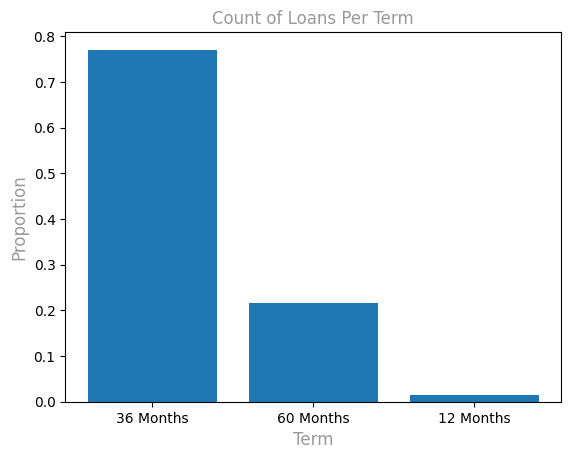

In [16]:
# Plot Term bar chart
heights = loans_features.Term.value_counts(normalize=True)
locations = np.arange(0, loans_features.Term.nunique())
labels = ['36 Months', '60 Months', '12 Months']
terms_title = 'Count of Loans Per Term'
barPlot(heights, locations, labels, terms_title, 'Term', 'Proportion')

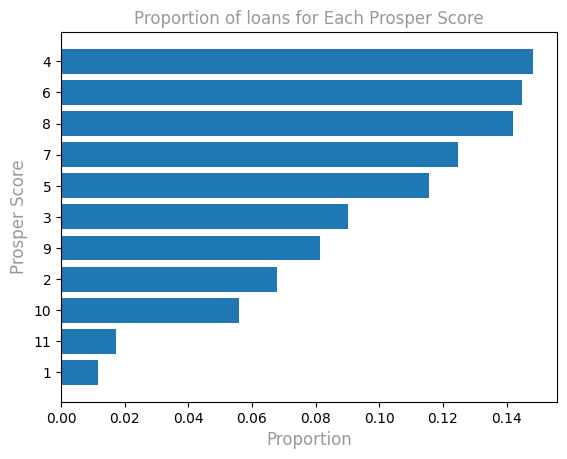

In [74]:
vert_heights = loans_features.ProsperScore.value_counts(normalize=True, ascending=True)
locations = np.arange(0, loans_features.ProsperScore.nunique())
labels = [f'{int(value)}' for value in vert_heights.index]
barhPlot(vert_heights, locations, labels, 'Proportion of loans for Each Prosper Score',
         'Proportion', 'Prosper Score')

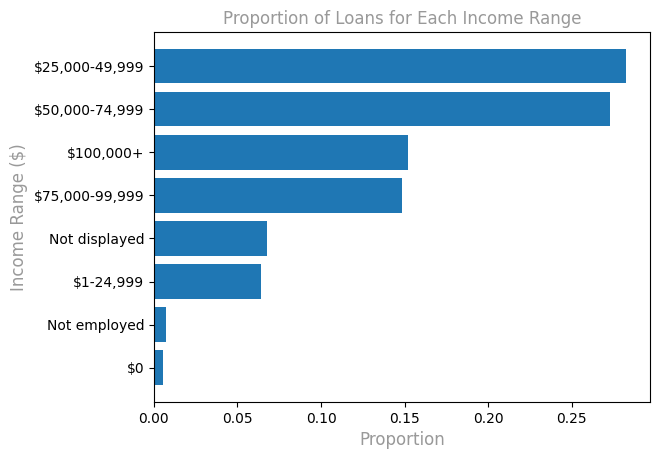

In [77]:
income_range = loans_features.IncomeRange.value_counts(normalize=True, ascending=True)
locations = np.arange(0, loans_features.IncomeRange.nunique())
labels = [Range for Range in income_range.index]
barhPlot(income_range, locations, labels, 'Proportion of Loans for Each Income Range',
         'Proportion', 'Income Range ($)')

In [19]:
def hist_plot(data, x_values, plot_title,x_label, y_label, bins):
    '''
        This function takes six arguments in total
        data - The Dataframe containig the column to plot
        x_values - The col to plot in the distribution
        plot_title - The title of the plot
        x_label - The x-axis label
        y_label - The y-axis label
        bins - The number of bins and sizes of the bins
    '''
    plt.hist(data=data, x=x_values, bins=bins)
    plt.title(plot_title, fontdict=font)
    plt.xlabel(x_label, fontdict=font)
    plt.ylabel(y_label, fontdict=font)

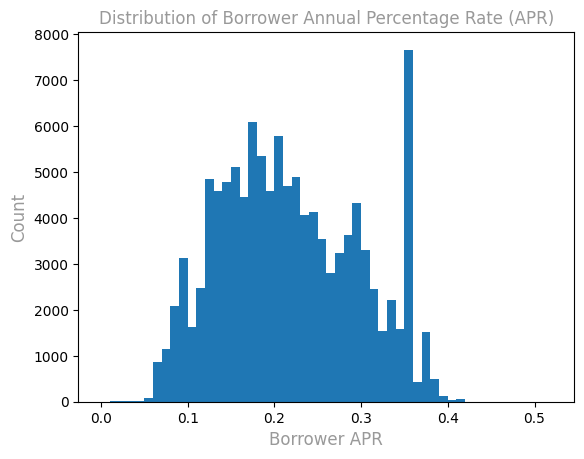

In [69]:
bins = np.arange(0, loans_features.BorrowerAPR.max()+0.01, 0.01)
hist_plot(loans_features, 'BorrowerAPR', 'Distribution of Borrower Annual Percentage Rate (APR)',
          'Borrower APR', 'Count', bins)

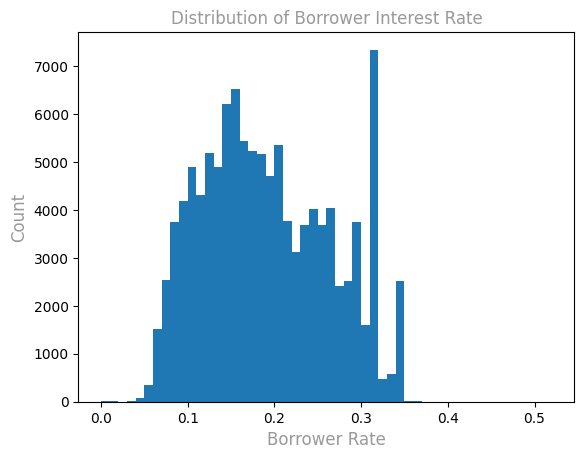

In [25]:
bins = np.arange(0, loans_features.BorrowerAPR.max()+0.01, 0.01)
hist_plot(loans_features, 'BorrowerRate', 'Distribution of Borrower Interest Rate',
          'Borrower Rate', 'Count', bins)

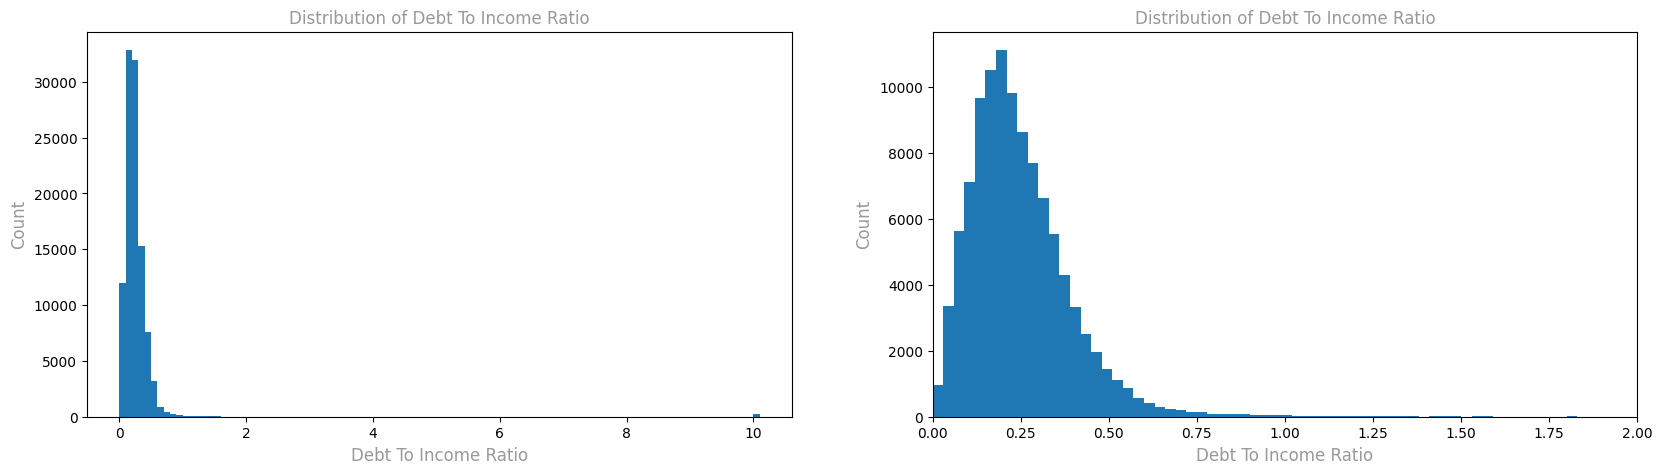

In [66]:
# Distribution of Debt to income ratio
plt.figure(figsize=[20, 5])
plt.subplot(1, 2, 1)
bins = np.arange(0, loans_features.DebtToIncomeRatio.max()+0.1, 0.1)
hist_plot(loans_features, 'DebtToIncomeRatio', 'Distribution of Debt To Income Ratio',
          'Debt To Income Ratio', 'Count', bins)

plt.subplot(1, 2, 2)
bins = np.arange(0, loans_features.DebtToIncomeRatio.max()+0.03, 0.03)
hist_plot(loans_features, 'DebtToIncomeRatio', 'Distribution of Debt To Income Ratio',
          'Debt To Income Ratio', 'Count', bins)
plt.xlim(0, 2);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate-Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [78]:
# Function to plot countplots
def countPlot(data, x_values, hue_col, count_title, x_label, y_label):
    '''
       This function takes six arguments in total
       data - The Dataframe containing the column to plot
       x_values - The column containing the values to plot
       hue_col - The column to create the cluster/hue
       count_title - The plot title
       x_label - The x-axis label
       y_label - The y-axis label
    '''
    sb.countplot(data=data, x=x_values, hue=hue_col, palette='viridis_r')
    plt.title(count_title, fontdict=font)
    plt.xlabel(x_label, fontdict=font)
    plt.ylabel(y_label, fontdict=font)

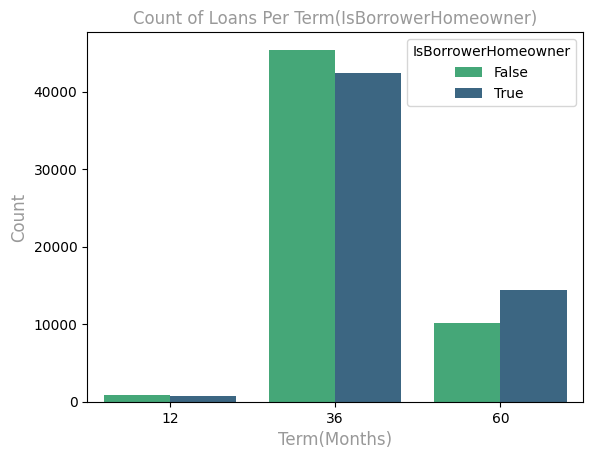

In [79]:
# Check favoured loan term by Borrowers who are homeowners
IBH_title = 'Count of Loans Per Term(IsBorrowerHomeowner)'
countPlot(loans_features, 'Term', 'IsBorrowerHomeowner', IBH_title, 'Term(Months)', 'Count')

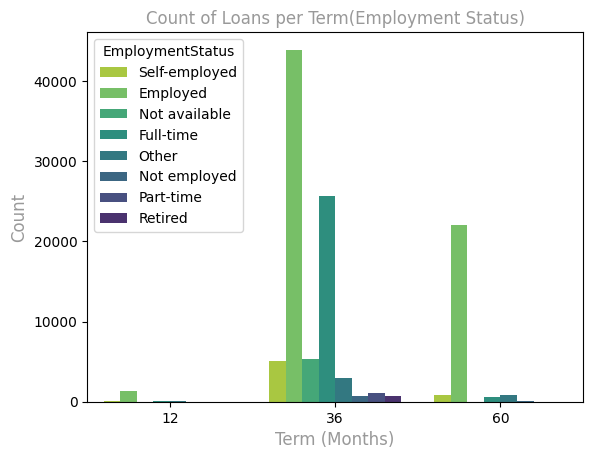

In [80]:
ES_title = 'Count of Loans per Term(Employment Status)'
countPlot(loans_features, 'Term', 'EmploymentStatus', ES_title, 'Term (Months)', 'Count')

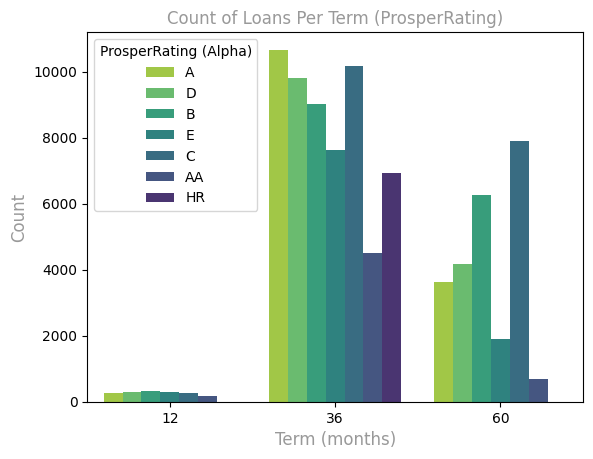

In [81]:
PR_title = 'Count of Loans Per Term (ProsperRating)'
countPlot(loans_features, 'Term', 'ProsperRating (Alpha)', PR_title,'Term (months)', 'Count')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate-Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

